In [1]:
import pandas as pd 
import numpy as np 

import sys 
sys.path.append('/scratch/dtolgay/post_processing_fire_outputs/skirt/python_files/analyze_hden_metallicity_turbulence_isrf_radius/get_isrf')
from get_isrf_from_skirt_voronoi import find_indices_of_wavelengths, eV_2_micron # type: ignore

import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size': 16, 'figure.figsize': (8,6), 'figure.dpi': 100})
# Change font family 
# plt.rcParams['font.family'] = 'serif'


In [6]:
galaxy_name = "gal0"
galaxy_type = "firebox"
redshift = "2.0"
which_FIRE = galaxy_type

runs = {
    "niagara": {
        "directory_name": "voronoi_1e5",
        "color": "tab:blue",
    },
    "trillium": {
        "directory_name": "skirt_new",
        "color": "tab:orange",
    }, 
}

In [7]:
for key, value in runs.items():
    # directory_path = f"/scratch/dongwooc/scratch_rwa/doga/runs_hden_radius/{which_FIRE}/z{redshift}/{galaxy_name}/{value['directory_name']}"    
    # skirt_galaxy_path_wout_extension = f"{directory_path}/{galaxy_name}"
    
    # wavelengths_filename = skirt_galaxy_path_wout_extension +"_grid_radiationField_wavelengths.dat"
    # wavelength_indices, wavelengths = find_indices_of_wavelengths(wavelengths_filename, 
    #                                                                 min_wavelength = eV_2_micron(13.6),
    #                                                                 max_wavelength = eV_2_micron(6), 
    #                                                                 debug = True)    

    # Read isrf_gas.txt 
    
    directory_path = f"/scratch/dongwooc/scratch_rwa/doga/runs_hden_radius/{which_FIRE}/z{redshift}/{galaxy_name}/{value['directory_name']}"
    isrf_gas_filename = f"{directory_path}/isrf_gas.txt"
    print(isrf_gas_filename)
    isrf_gas = np.loadtxt(isrf_gas_filename)
    
    value['isrf_gas'] = isrf_gas

/scratch/dongwooc/scratch_rwa/doga/runs_hden_radius/firebox/z2.0/gal0/voronoi_1e5/isrf_gas.txt
/scratch/dongwooc/scratch_rwa/doga/runs_hden_radius/firebox/z2.0/gal0/skirt_new/isrf_gas.txt


/tmp/ipykernel_1659469/854985156.py:6: RuntimeWarning: divide by zero encountered in log10
  ax.hist(np.log10(value['isrf_gas']), bins=bins, label=key)


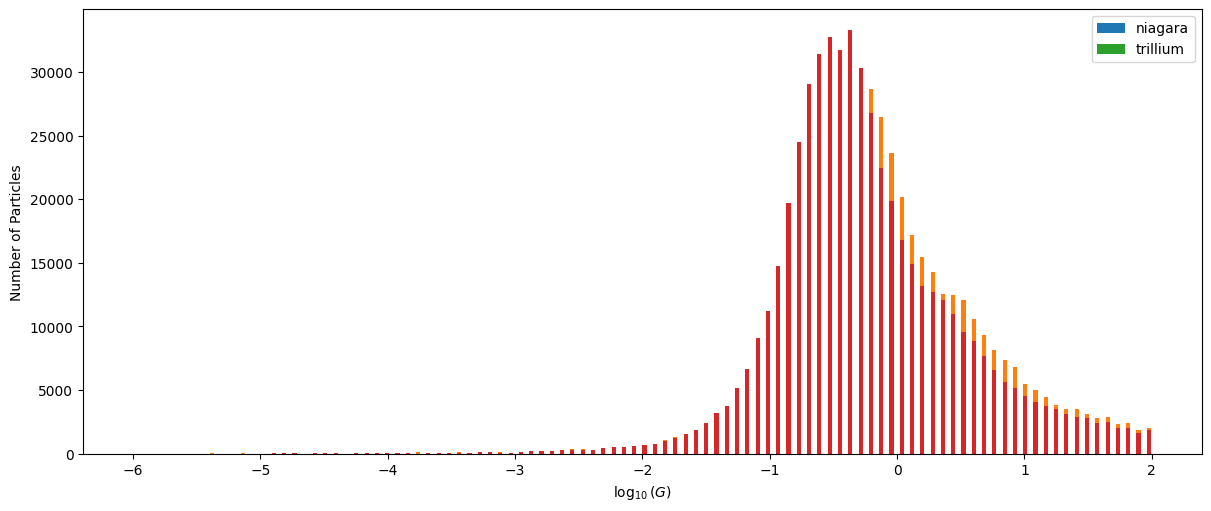

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(12, 5), constrained_layout=True)

for key, value in runs.items():
    bins = np.linspace(-6, 2, 100)
    ax = axs
    ax.hist(np.log10(value['isrf_gas']), bins=bins, label=key, color=value['color'], alpha=0.5)
    ax.set_xlabel(r'$\log_{10}(G)$')
    ax.set_ylabel('Number of Particles')


ax.legend()
plt.show()

In [5]:
# ############### Reading files
# # Define the name of the galaxy and gas particles files.

# # directory_path = f"/mnt/raid-cita/dtolgay/FIRE/post_processing_fire_outputs/skirt/runs_hden_radius/{which_FIRE}/z{redshift}/{galaxy_name}/trial1"   
# if redshift in ["2.0", "3.0"]: 
#     directory_path = f"/gpfs/fs0/scratch/r/rbond/dongwooc/scratch_rwa/doga/runs_hden_radius/{which_FIRE}/z{redshift}/{galaxy_name}/{directory_name}"    
# else: 
#     sys.exit("Code only works for z=2.0. Implement other redshifts.")

# skirt_galaxy_path_wout_extension = f"{directory_path}/{galaxy_name}"

# print(f"directory_path: {directory_path}")


# ### Check if file exits. If it exists do not runs the code: 
# if os.path.isfile(f"{directory_path}/isrf_gas.txt"):
#     print("File exits. Returning nothing!")
#     return 0
# else:
#     print(f"{directory_path}/isrf_gas.txt doesn't exitst. Continuing...")



# #### Get the wavelengths 
# wavelengths_filename = skirt_galaxy_path_wout_extension +"_grid_radiationField_wavelengths.dat"
# print(f"\nwavelengths_filename: {wavelengths_filename}")
# wavelength_indices, wavelengths = find_indices_of_wavelengths(wavelengths_filename, 
#                                                                 min_wavelength = eV_2_micron(13.6),
#                                                                 max_wavelength = eV_2_micron(6), 
#                                                                 debug = True) 


# #### Read cell properties 